# 📈 Calculus for Deep Learning

## A Beginner-Friendly, Zero-to-Hero Guide

---

**Welcome!** This notebook will teach you the essential calculus concepts that make neural networks learn. While linear algebra defines *what* computations happen, calculus tells us *how to improve* our model.

### 🎯 What You'll Learn

| Section | Topic | Deep Learning Connection |
|---------|-------|-------------------------|
| 1 | Derivatives | Rate of change, sensitivity |
| 2 | Chain Rule | Backpropagation foundation |
| 3 | Partial Derivatives & Gradients | Multi-variable optimization |
| 4 | Gradient Descent | How neural networks learn |
| 5 | Backpropagation | The heart of deep learning |

### 🧠 Why Calculus Matters for Deep Learning

```
Training Loop:
1. Forward pass    → Compute predictions
2. Compute loss    → How wrong are we?
3. BACKPROPAGATION → Use CALCULUS to find gradients
4. Update weights  → Move in opposite direction of gradient
5. Repeat!
```

**Neural networks learn by computing derivatives and following gradients downhill!**

---

## ⚙️ Setup

Let's import the libraries we'll use throughout this notebook.

In [1]:
# Core libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# For beautiful visualizations
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['font.size'] = 12

# Set random seed for reproducibility
np.random.seed(42)

print("✅ Setup complete!")
print(f"NumPy version: {np.__version__}")

✅ Setup complete!
NumPy version: 2.0.2


## 📚 Introduction: The Language of Learning

Before diving into derivatives, let's understand the big picture.

### The Learning Problem

Neural networks have **millions of parameters** (weights and biases). How do we know which direction to adjust them to make better predictions?

**Answer: Derivatives!**

A derivative tells us:
- **Direction**: Should we increase or decrease a weight?
- **Magnitude**: How sensitive is the output to this weight?

Let's see a simple example:

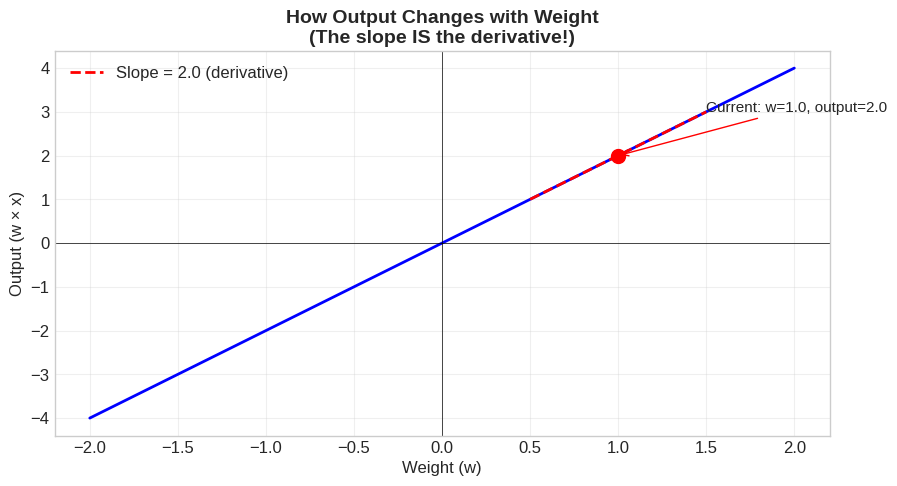

💡 Key Insight:
   If we increase w by a tiny amount ε, output increases by 2.0ε
   The derivative dy/dw = 2.0 tells us exactly this rate of change!


In [2]:
# Simple example: How does changing weight affect output?

def simple_neuron(x, w):
    """A single neuron: output = w * x"""
    return w * x

x = 2.0  # Fixed input
weights = np.linspace(-2, 2, 100)
outputs = [simple_neuron(x, w) for w in weights]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(weights, outputs, 'b-', linewidth=2)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Mark current weight and show slope
w_current = 1.0
y_current = simple_neuron(x, w_current)
plt.scatter([w_current], [y_current], color='red', s=100, zorder=5)
plt.annotate(f'Current: w={w_current}, output={y_current}',
             xy=(w_current, y_current), xytext=(w_current+0.5, y_current+1),
             fontsize=11, arrowprops=dict(arrowstyle='->', color='red'))

# Draw tangent line (the derivative!)
slope = x  # dy/dw = x (the derivative)
tangent_x = np.array([w_current-0.5, w_current+0.5])
tangent_y = y_current + slope * (tangent_x - w_current)
plt.plot(tangent_x, tangent_y, 'r--', linewidth=2, label=f'Slope = {slope} (derivative)')

plt.xlabel('Weight (w)', fontsize=12)
plt.ylabel('Output (w × x)', fontsize=12)
plt.title('How Output Changes with Weight\n(The slope IS the derivative!)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("💡 Key Insight:")
print(f"   If we increase w by a tiny amount ε, output increases by {x}ε")
print(f"   The derivative dy/dw = {x} tells us exactly this rate of change!")

## 1️⃣ Derivatives: The Foundation

A **derivative** measures how much a function's output changes when its input changes by a tiny amount.

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}$$

### Common Derivatives in Deep Learning

| Function | Derivative | Deep Learning Use |
|----------|------------|-------------------|
| f(x) = x² | f'(x) = 2x | MSE loss |
| f(x) = eˣ | f'(x) = eˣ | Softmax |
| f(x) = ln(x) | f'(x) = 1/x | Cross-entropy loss |
| f(x) = sigmoid | f'(x) = f(x)(1-f(x)) | Activation |
| f(x) = ReLU | f'(x) = 0 or 1 | Activation |

---

### 🎓 What's Next?

Now that you've seen the intuition, we'll systematically build up:

1. **Derivatives** - The fundamental concept
2. **Chain Rule** - Derivatives of composed functions
3. **Gradients** - Derivatives with multiple variables
4. **Gradient Descent** - Using derivatives to learn
5. **Backpropagation** - Efficient gradient computation

Let's begin! 🚀

---

In [3]:
# Computing derivatives numerically vs analytically
def numerical_derivative(f, x, h=1e-5):
    """Compute derivative using finite differences"""
    return (f(x + h) - f(x - h)) / (2 * h)  # Central difference (more accurate)

# Example: f(x) = x²
def f(x):
    return x ** 2

def f_derivative_analytical(x):
    """Analytical derivative: d/dx(x²) = 2x"""
    return 2 * x

x_test = 3.0
numerical = numerical_derivative(f, x_test)
analytical = f_derivative_analytical(x_test)

print("📐 Computing Derivatives")
print("="*40)
print(f"Function: f(x) = x²")
print(f"At x = {x_test}:")
print(f"  f({x_test}) = {f(x_test)}")
print(f"\n  Numerical derivative:  {numerical:.6f}")
print(f"  Analytical derivative: {analytical:.6f}")
print(f"  Difference: {abs(numerical - analytical):.10f}")
print("\n✅ They match! (tiny error is from numerical approximation)")

📐 Computing Derivatives
Function: f(x) = x²
At x = 3.0:
  f(3.0) = 9.0

  Numerical derivative:  6.000000
  Analytical derivative: 6.000000
  Difference: 0.0000000000

✅ They match! (tiny error is from numerical approximation)


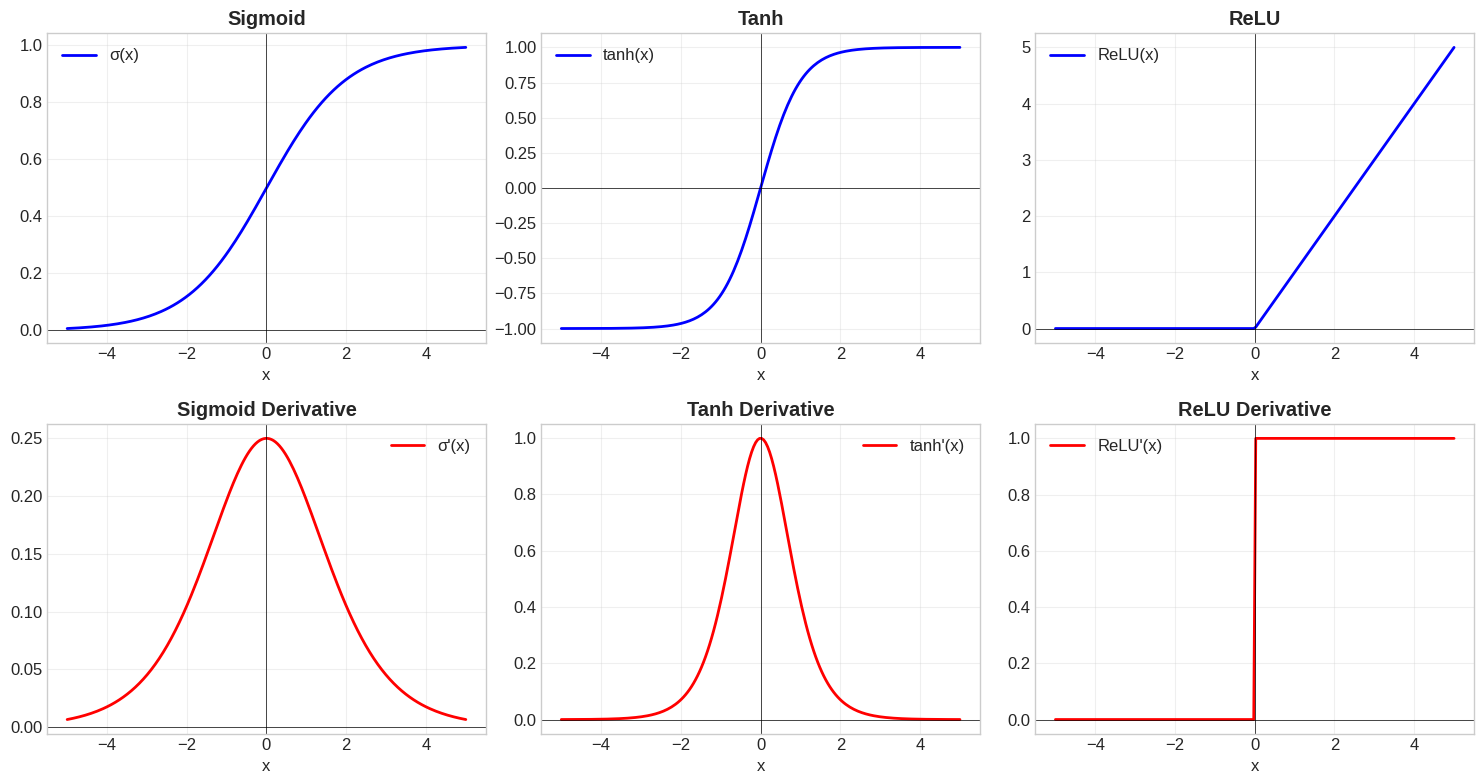

💡 Key Insights:
   • Sigmoid/Tanh: Derivatives → 0 for large |x| (vanishing gradient problem!)
   • ReLU: Derivative is 0 or 1 (no vanishing gradient for x > 0)
   • This is why ReLU became the default activation in modern networks!


In [4]:
# Visualizing activation functions and their derivatives
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

x = np.linspace(-5, 5, 200)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_deriv = sigmoid * (1 - sigmoid)
axes[0, 0].plot(x, sigmoid, 'b-', linewidth=2, label='σ(x)')
axes[0, 0].set_title('Sigmoid', fontweight='bold')
axes[1, 0].plot(x, sigmoid_deriv, 'r-', linewidth=2, label="σ'(x)")
axes[1, 0].set_title("Sigmoid Derivative", fontweight='bold')

# Tanh
tanh = np.tanh(x)
tanh_deriv = 1 - tanh**2
axes[0, 1].plot(x, tanh, 'b-', linewidth=2, label='tanh(x)')
axes[0, 1].set_title('Tanh', fontweight='bold')
axes[1, 1].plot(x, tanh_deriv, 'r-', linewidth=2, label="tanh'(x)")
axes[1, 1].set_title("Tanh Derivative", fontweight='bold')

# ReLU
relu = np.maximum(0, x)
relu_deriv = (x > 0).astype(float)
axes[0, 2].plot(x, relu, 'b-', linewidth=2, label='ReLU(x)')
axes[0, 2].set_title('ReLU', fontweight='bold')
axes[1, 2].plot(x, relu_deriv, 'r-', linewidth=2, label="ReLU'(x)")
axes[1, 2].set_title("ReLU Derivative", fontweight='bold')

for ax in axes.flat:
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.grid(True, alpha=0.3)
    ax.legend()
    ax.set_xlabel('x')

plt.tight_layout()
plt.show()

print("💡 Key Insights:")
print("   • Sigmoid/Tanh: Derivatives → 0 for large |x| (vanishing gradient problem!)")
print("   • ReLU: Derivative is 0 or 1 (no vanishing gradient for x > 0)")
print("   • This is why ReLU became the default activation in modern networks!")

## 2️⃣ The Chain Rule - Heart of Backpropagation

The **chain rule** tells us how to take derivatives of composed functions.

If `y = f(g(x))`, then:

$$\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}$$

**This is EXACTLY how backpropagation works!** Gradients flow backward through each layer.

```
Input → Layer 1 → Layer 2 → Layer 3 → Loss
         ↑          ↑          ↑
         │          │          │
    ← dL/dW1 ← dL/dW2 ← dL/dW3 ←
    
    (Chain rule multiplies gradients backward!)
```

---

✅ **Section 1 Complete!** You now understand:
- Derivatives measure rate of change
- Numerical vs analytical computation
- Why ReLU helps with vanishing gradients

Next: **Chain Rule** - the backbone of backpropagation!

---

In [5]:
# Chain Rule Example: y = (3x + 2)²
# Let g(x) = 3x + 2, and y = g²
# dy/dx = dy/dg * dg/dx = 2g * 3 = 6(3x + 2)

def g(x):
    return 3 * x + 2

def y(x):
    return g(x) ** 2

# Derivatives
def dg_dx(x):
    return 3  # d/dx(3x + 2) = 3

def dy_dg(x):
    return 2 * g(x)  # d/dg(g²) = 2g

def dy_dx_chain_rule(x):
    return dy_dg(x) * dg_dx(x)  # Chain rule!

x_test = 2.0
print("⛓️ Chain Rule Example: y = (3x + 2)²")
print("="*45)
print(f"x = {x_test}")
print(f"g(x) = 3x + 2 = {g(x_test)}")
print(f"y = g² = {y(x_test)}")
print(f"\nUsing Chain Rule:")
print(f"  dg/dx = 3")
print(f"  dy/dg = 2g = 2 × {g(x_test)} = {dy_dg(x_test)}")
print(f"  dy/dx = dy/dg × dg/dx = {dy_dg(x_test)} × {dg_dx(x_test)} = {dy_dx_chain_rule(x_test)}")
print(f"\nVerify numerically: {numerical_derivative(y, x_test):.4f}")
print(f"✅ Match!")

⛓️ Chain Rule Example: y = (3x + 2)²
x = 2.0
g(x) = 3x + 2 = 8.0
y = g² = 64.0

Using Chain Rule:
  dg/dx = 3
  dy/dg = 2g = 2 × 8.0 = 16.0
  dy/dx = dy/dg × dg/dx = 16.0 × 3 = 48.0

Verify numerically: 48.0000
✅ Match!


In [6]:
# Deep Learning Example: Chain Rule Through a Mini Network
# x → [w1] → z1 → [sigmoid] → a1 → [w2] → z2 → [MSE loss] → L

def forward_pass(x, w1, w2, y_true):
    """Forward pass through mini network"""
    # Layer 1
    z1 = w1 * x
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid

    # Layer 2
    z2 = w2 * a1
    prediction = z2

    # Loss (MSE)
    loss = (prediction - y_true) ** 2

    return z1, a1, z2, prediction, loss

def backward_pass(x, w1, w2, y_true, z1, a1, z2, prediction):
    """Backward pass using chain rule"""
    # dL/d(prediction) = 2(prediction - y_true)
    dL_dpred = 2 * (prediction - y_true)

    # dL/dz2 = dL/dpred * dpred/dz2 = dL/dpred * 1
    dL_dz2 = dL_dpred

    # dL/dw2 = dL/dz2 * dz2/dw2 = dL/dz2 * a1
    dL_dw2 = dL_dz2 * a1

    # dL/da1 = dL/dz2 * dz2/da1 = dL/dz2 * w2
    dL_da1 = dL_dz2 * w2

    # dL/dz1 = dL/da1 * da1/dz1 = dL/da1 * sigmoid'(z1)
    sigmoid_deriv = a1 * (1 - a1)  # Sigmoid derivative
    dL_dz1 = dL_da1 * sigmoid_deriv

    # dL/dw1 = dL/dz1 * dz1/dw1 = dL/dz1 * x
    dL_dw1 = dL_dz1 * x

    return dL_dw1, dL_dw2

# Test
x = 2.0
w1 = 0.5
w2 = 0.8
y_true = 1.0

z1, a1, z2, pred, loss = forward_pass(x, w1, w2, y_true)
dL_dw1, dL_dw2 = backward_pass(x, w1, w2, y_true, z1, a1, z2, pred)

print("🧠 Chain Rule Through a Neural Network")
print("="*50)
print("Network: x → w1 → sigmoid → w2 → MSE Loss")
print(f"\nForward Pass:")
print(f"  x = {x}")
print(f"  z1 = w1 × x = {w1} × {x} = {z1}")
print(f"  a1 = sigmoid(z1) = {a1:.4f}")
print(f"  z2 = w2 × a1 = {w2} × {a1:.4f} = {z2:.4f}")
print(f"  prediction = {pred:.4f}")
print(f"  loss = (pred - y)² = ({pred:.4f} - {y_true})² = {loss:.4f}")

print(f"\nBackward Pass (Chain Rule!):")
print(f"  dL/dw2 = {dL_dw2:.4f}")
print(f"  dL/dw1 = {dL_dw1:.4f}")

print("\n💡 These gradients tell us how to adjust w1 and w2 to reduce loss!")

🧠 Chain Rule Through a Neural Network
Network: x → w1 → sigmoid → w2 → MSE Loss

Forward Pass:
  x = 2.0
  z1 = w1 × x = 0.5 × 2.0 = 1.0
  a1 = sigmoid(z1) = 0.7311
  z2 = w2 × a1 = 0.8 × 0.7311 = 0.5848
  prediction = 0.5848
  loss = (pred - y)² = (0.5848 - 1.0)² = 0.1724

Backward Pass (Chain Rule!):
  dL/dw2 = -0.6070
  dL/dw1 = -0.2612

💡 These gradients tell us how to adjust w1 and w2 to reduce loss!


## 3️⃣ Partial Derivatives & Gradients

Neural networks have **millions of parameters**. We need derivatives with respect to EACH one!

### Partial Derivative

A **partial derivative** measures how a function changes with respect to ONE variable, treating others as constants.

$$\frac{\partial f}{\partial x} = \text{derivative of } f \text{ treating everything except } x \text{ as constant}$$

### Gradient

The **gradient** is a vector of ALL partial derivatives:

$$\nabla f = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$

**Key property**: The gradient points in the direction of **steepest increase**!

---

✅ **Section 2 Complete!** You now understand:
- Chain rule for composed functions
- How gradients flow backward through layers
- The mathematical foundation of backpropagation

Next: **Partial Derivatives & Gradients** - multiple variables!

---

In [7]:
# Example: f(x, y) = x² + 2xy + y²
def f(x, y):
    return x**2 + 2*x*y + y**2

# Partial derivatives (computed analytically)
def df_dx(x, y):
    """∂f/∂x = 2x + 2y (treat y as constant)"""
    return 2*x + 2*y

def df_dy(x, y):
    """∂f/∂y = 2x + 2y (treat x as constant)"""
    return 2*x + 2*y

def gradient(x, y):
    """Gradient = [∂f/∂x, ∂f/∂y]"""
    return np.array([df_dx(x, y), df_dy(x, y)])

# Test at point (1, 2)
x, y = 1.0, 2.0
print("📐 Partial Derivatives and Gradient")
print("="*45)
print(f"Function: f(x, y) = x² + 2xy + y²")
print(f"Point: (x, y) = ({x}, {y})")
print(f"f({x}, {y}) = {f(x, y)}")
print(f"\n∂f/∂x = 2x + 2y = {df_dx(x, y)}")
print(f"∂f/∂y = 2x + 2y = {df_dy(x, y)}")
print(f"\nGradient ∇f = [{df_dx(x, y)}, {df_dy(x, y)}]")
print(f"Gradient magnitude: {np.linalg.norm(gradient(x, y)):.2f}")

print("\n💡 The gradient points toward steepest ascent!")
print("   To minimize, go in the OPPOSITE direction (negative gradient).")

📐 Partial Derivatives and Gradient
Function: f(x, y) = x² + 2xy + y²
Point: (x, y) = (1.0, 2.0)
f(1.0, 2.0) = 9.0

∂f/∂x = 2x + 2y = 6.0
∂f/∂y = 2x + 2y = 6.0

Gradient ∇f = [6.0, 6.0]
Gradient magnitude: 8.49

💡 The gradient points toward steepest ascent!
   To minimize, go in the OPPOSITE direction (negative gradient).


## 4️⃣ Gradient Descent - How Neural Networks Learn

**Gradient descent** is the algorithm that makes neural networks learn:

```
repeat:
    gradient = compute_gradient(loss, weights)
    weights = weights - learning_rate * gradient
```

The key equation:

$$\mathbf{w}_{new} = \mathbf{w}_{old} - \eta \cdot \nabla L$$

Where:
- **η** (eta) = learning rate (step size)
- **∇L** = gradient of loss with respect to weights

---

✅ **Section 3 Complete!** You now understand:
- Partial derivatives for individual variables
- Gradients as vectors of all partials
- Gradient direction = steepest ascent

Next: **Gradient Descent** - the learning algorithm!

---

/tmp/ipython-input-1023269322.py:45: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1023269322.py:45: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


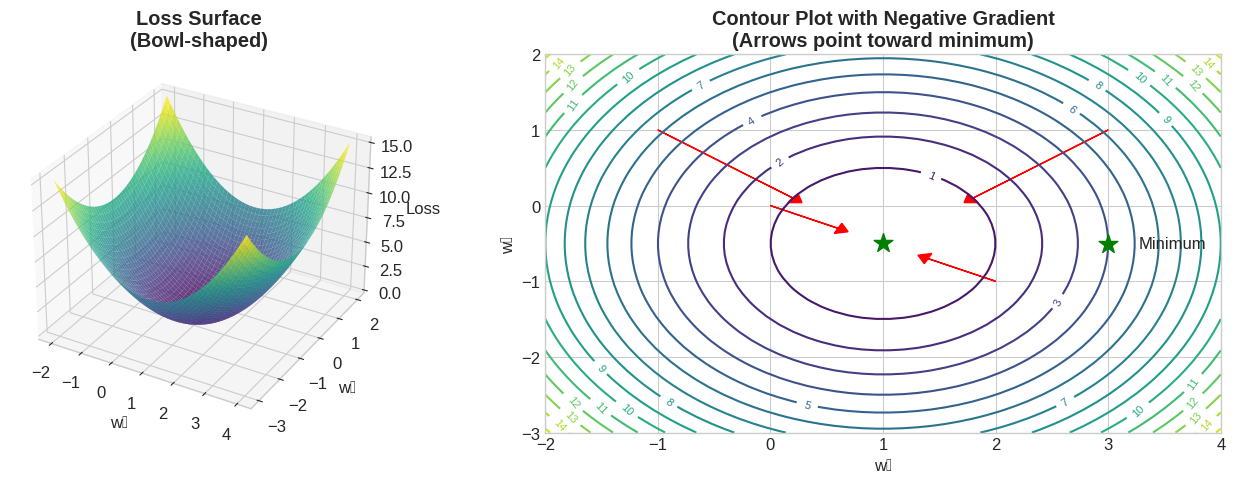

💡 Key Insight: Gradient descent follows the negative gradient downhill!
   Red arrows show the direction we should move to reduce loss.


In [8]:
# Visualizing gradient on a loss surface
fig = plt.figure(figsize=(14, 5))

# Loss function (bowl shape)
def loss(w1, w2):
    return (w1 - 1)**2 + (w2 + 0.5)**2

def loss_gradient(w1, w2):
    return np.array([2*(w1 - 1), 2*(w2 + 0.5)])

# Create grid
w1_range = np.linspace(-2, 4, 50)
w2_range = np.linspace(-3, 2, 50)
W1, W2 = np.meshgrid(w1_range, w2_range)
L = loss(W1, W2)

# 3D surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(W1, W2, L, cmap='viridis', alpha=0.8)
ax1.set_xlabel('w₁')
ax1.set_ylabel('w₂')
ax1.set_zlabel('Loss')
ax1.set_title('Loss Surface\n(Bowl-shaped)', fontweight='bold')

# 2D contour with gradient arrows
ax2 = fig.add_subplot(122)
contour = ax2.contour(W1, W2, L, levels=15, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)

# Plot gradient arrows at several points
points = [(-1, 1), (0, 0), (2, -1), (3, 1)]
for w1, w2 in points:
    grad = loss_gradient(w1, w2)
    # Negative gradient (direction of descent)
    ax2.arrow(w1, w2, -grad[0]*0.3, -grad[1]*0.3,
              head_width=0.15, head_length=0.1, fc='red', ec='red')

# Mark minimum
ax2.scatter([1], [-0.5], color='green', s=200, marker='*', zorder=5, label='Minimum')
ax2.set_xlabel('w₁')
ax2.set_ylabel('w₂')
ax2.set_title('Contour Plot with Negative Gradient\n(Arrows point toward minimum)', fontweight='bold')
ax2.legend()

plt.tight_layout()
plt.show()

print("💡 Key Insight: Gradient descent follows the negative gradient downhill!")
print("   Red arrows show the direction we should move to reduce loss.")

In [9]:
# Gradient Descent Implementation
def gradient_descent(loss_fn, grad_fn, initial_weights, learning_rate, num_steps):
    """
    Perform gradient descent optimization.

    Returns: history of (weights, loss) at each step
    """
    weights = np.array(initial_weights, dtype=float)
    history = [(weights.copy(), loss_fn(*weights))]

    for _ in range(num_steps):
        gradient = grad_fn(*weights)
        weights = weights - learning_rate * gradient
        history.append((weights.copy(), loss_fn(*weights)))

    return history

# Use our loss function from before
# loss(w1, w2) = (w1 - 1)² + (w2 + 0.5)²
# Minimum at (1, -0.5)

initial = [-1.5, 1.5]
lr = 0.1
steps = 30

history = gradient_descent(loss, loss_gradient, initial, lr, steps)

print("🚀 Gradient Descent in Action")
print("="*50)
print(f"Loss function: L(w₁, w₂) = (w₁ - 1)² + (w₂ + 0.5)²")
print(f"True minimum: (1.0, -0.5)")
print(f"Initial weights: {initial}")
print(f"Learning rate: {lr}")
print(f"\nOptimization path:")
for i, (w, l) in enumerate(history[:6]):
    print(f"  Step {i}: w = [{w[0]:.4f}, {w[1]:.4f}], loss = {l:.4f}")
print("  ...")
final_w, final_l = history[-1]
print(f"  Step {len(history)-1}: w = [{final_w[0]:.4f}, {final_w[1]:.4f}], loss = {final_l:.6f}")
print(f"\n✅ Converged to approximately (1.0, -0.5)!")

🚀 Gradient Descent in Action
Loss function: L(w₁, w₂) = (w₁ - 1)² + (w₂ + 0.5)²
True minimum: (1.0, -0.5)
Initial weights: [-1.5, 1.5]
Learning rate: 0.1

Optimization path:
  Step 0: w = [-1.5000, 1.5000], loss = 10.2500
  Step 1: w = [-1.0000, 1.1000], loss = 6.5600
  Step 2: w = [-0.6000, 0.7800], loss = 4.1984
  Step 3: w = [-0.2800, 0.5240], loss = 2.6870
  Step 4: w = [-0.0240, 0.3192], loss = 1.7197
  Step 5: w = [0.1808, 0.1554], loss = 1.1006
  ...
  Step 30: w = [0.9969, -0.4975], loss = 0.000016

✅ Converged to approximately (1.0, -0.5)!


/tmp/ipython-input-2377736432.py:31: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2377736432.py:31: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()


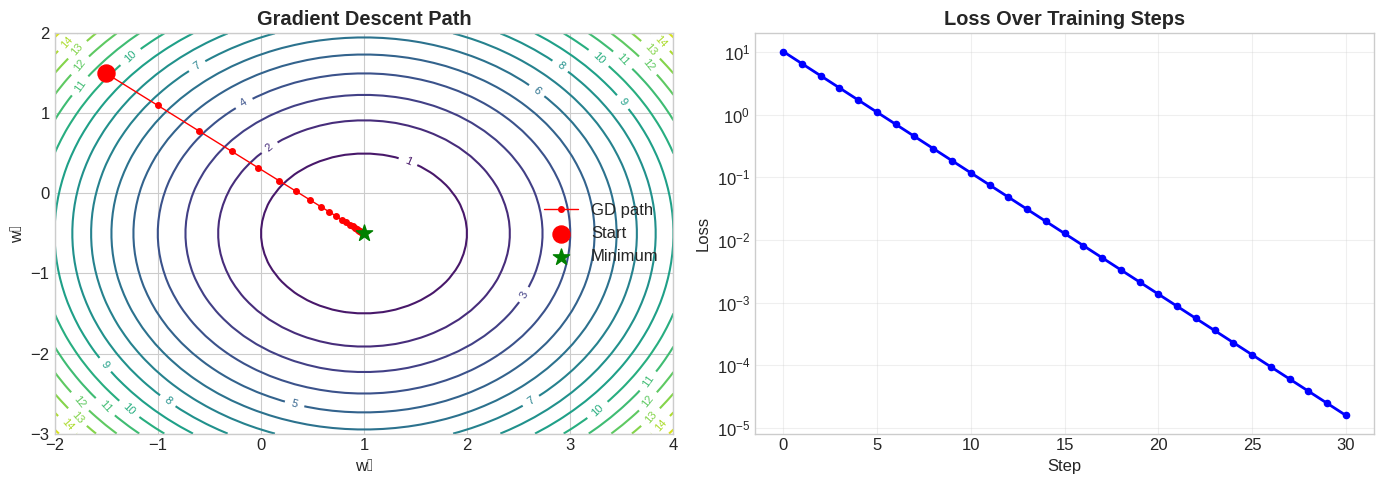

💡 Key Insight: Gradient descent 'rolls downhill' on the loss surface!
   Each step moves in the direction of steepest descent.


In [10]:
# Visualizing the gradient descent path
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Path on contour plot
ax1 = axes[0]
contour = ax1.contour(W1, W2, L, levels=15, cmap='viridis')
ax1.clabel(contour, inline=True, fontsize=8)

# Plot path
weights_path = np.array([h[0] for h in history])
ax1.plot(weights_path[:, 0], weights_path[:, 1], 'ro-', markersize=4, linewidth=1, label='GD path')
ax1.scatter([initial[0]], [initial[1]], color='red', s=150, marker='o', zorder=5, label='Start')
ax1.scatter([1], [-0.5], color='green', s=150, marker='*', zorder=5, label='Minimum')

ax1.set_xlabel('w₁')
ax1.set_ylabel('w₂')
ax1.set_title('Gradient Descent Path', fontweight='bold')
ax1.legend()

# Right: Loss over time
ax2 = axes[1]
losses = [h[1] for h in history]
ax2.plot(losses, 'b-', linewidth=2)
ax2.scatter(range(len(losses)), losses, color='blue', s=20)
ax2.set_xlabel('Step')
ax2.set_ylabel('Loss')
ax2.set_title('Loss Over Training Steps', fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 Key Insight: Gradient descent 'rolls downhill' on the loss surface!")
print("   Each step moves in the direction of steepest descent.")

/tmp/ipython-input-1782434308.py:20: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1782434308.py:20: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()


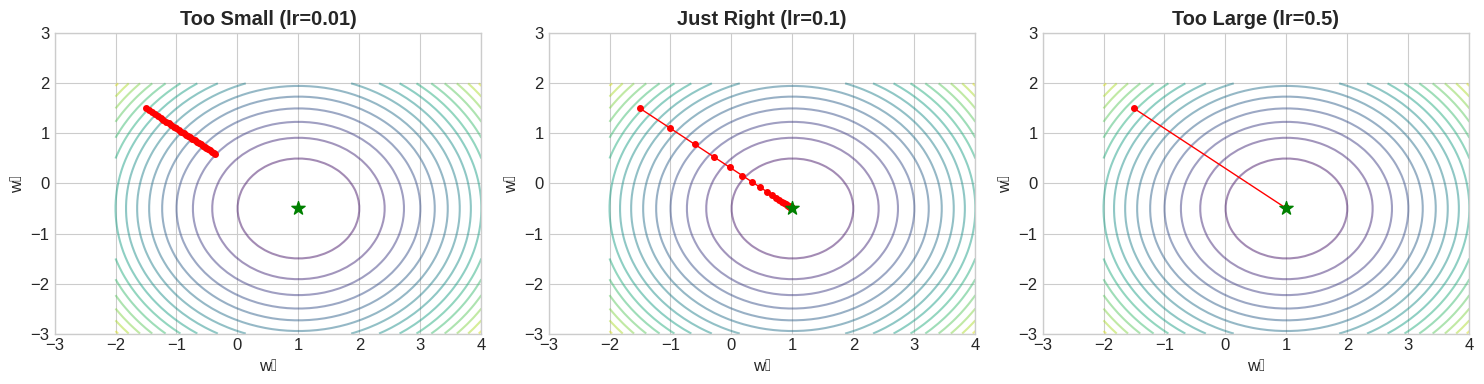

💡 Learning Rate is CRITICAL:
   • Too small → Very slow convergence
   • Just right → Smooth, efficient convergence
   • Too large → Oscillation, may diverge!


In [11]:
# Learning Rate Effects
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

learning_rates = [0.01, 0.1, 0.5]
titles = ['Too Small (lr=0.01)', 'Just Right (lr=0.1)', 'Too Large (lr=0.5)']

for ax, lr, title in zip(axes, learning_rates, titles):
    history = gradient_descent(loss, loss_gradient, [-1.5, 1.5], lr, 30)
    weights_path = np.array([h[0] for h in history])

    contour = ax.contour(W1, W2, L, levels=15, cmap='viridis', alpha=0.5)
    ax.plot(weights_path[:, 0], weights_path[:, 1], 'ro-', markersize=4, linewidth=1)
    ax.scatter([1], [-0.5], color='green', s=100, marker='*', zorder=5)
    ax.set_xlabel('w₁')
    ax.set_ylabel('w₂')
    ax.set_title(title, fontweight='bold')
    ax.set_xlim(-3, 4)
    ax.set_ylim(-3, 3)

plt.tight_layout()
plt.show()

print("💡 Learning Rate is CRITICAL:")
print("   • Too small → Very slow convergence")
print("   • Just right → Smooth, efficient convergence")
print("   • Too large → Oscillation, may diverge!")

## 5️⃣ Backpropagation - The Heart of Deep Learning

**Backpropagation** is just the **chain rule** applied efficiently to compute ALL gradients in a neural network.

### The Key Insight

Instead of computing gradients from scratch for each weight, we:
1. **Forward pass**: Compute and SAVE all intermediate values
2. **Backward pass**: Use chain rule from output to input, reusing saved values

This reduces computation from O(n²) to O(n) for n weights!

---

✅ **Section 4 Complete!** You now understand:
- Gradient descent algorithm
- How weights are updated to minimize loss
- The crucial role of learning rate

Next: **Backpropagation** - efficient gradient computation!

---

In [12]:
# Complete Backpropagation Example: XOR Problem
# Network: 2 inputs → 2 hidden (sigmoid) → 1 output (sigmoid)

class SimpleNeuralNetwork:
    def __init__(self):
        # Xavier/He initialization
        np.random.seed(42)
        self.W1 = np.random.randn(2, 4) * 0.5  # 2 inputs → 4 hidden
        self.b1 = np.zeros((1, 4))
        self.W2 = np.random.randn(4, 1) * 0.5  # 4 hidden → 1 output
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        """Forward pass - save values for backprop"""
        self.X = X
        self.z1 = X @ self.W1 + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = self.a1 @ self.W2 + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, y_true, learning_rate=0.5):
        """Backward pass - compute gradients using chain rule"""
        m = y_true.shape[0]  # batch size

        # Output layer gradients (chain rule!)
        dL_da2 = 2 * (self.a2 - y_true)  # MSE derivative
        da2_dz2 = self.sigmoid_derivative(self.a2)
        dz2 = dL_da2 * da2_dz2  # Element-wise for batch

        dW2 = (self.a1.T @ dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden layer gradients (chain rule continues!)
        da1 = dz2 @ self.W2.T
        dz1 = da1 * self.sigmoid_derivative(self.a1)

        dW1 = (self.X.T @ dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Update weights (gradient descent step)
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

        return np.mean((self.a2 - y_true) ** 2)  # Return loss

# XOR data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train!
nn = SimpleNeuralNetwork()
losses = []

print("🧠 Training Neural Network with Backpropagation")
print("="*50)
print("Problem: XOR (not linearly separable!)")
print(f"Architecture: 2 → 4 → 1")

for epoch in range(5000):
    predictions = nn.forward(X)
    loss = nn.backward(y, learning_rate=1.0)
    losses.append(loss)

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.6f}")

print(f"\nFinal predictions:")
for xi, yi, pred in zip(X, y, predictions):
    print(f"  Input: {xi} → Pred: {pred[0]:.3f} (Target: {yi[0]})")

🧠 Training Neural Network with Backpropagation
Problem: XOR (not linearly separable!)
Architecture: 2 → 4 → 1
Epoch 0: Loss = 0.255675
Epoch 1000: Loss = 0.203313
Epoch 2000: Loss = 0.005210
Epoch 3000: Loss = 0.001743
Epoch 4000: Loss = 0.001005

Final predictions:
  Input: [0 0] → Pred: 0.030 (Target: 0)
  Input: [0 1] → Pred: 0.975 (Target: 1)
  Input: [1 0] → Pred: 0.975 (Target: 1)
  Input: [1 1] → Pred: 0.025 (Target: 0)


/tmp/ipython-input-2900425253.py:25: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2900425253.py:25: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Liberation Sans.
  plt.tight_layout()


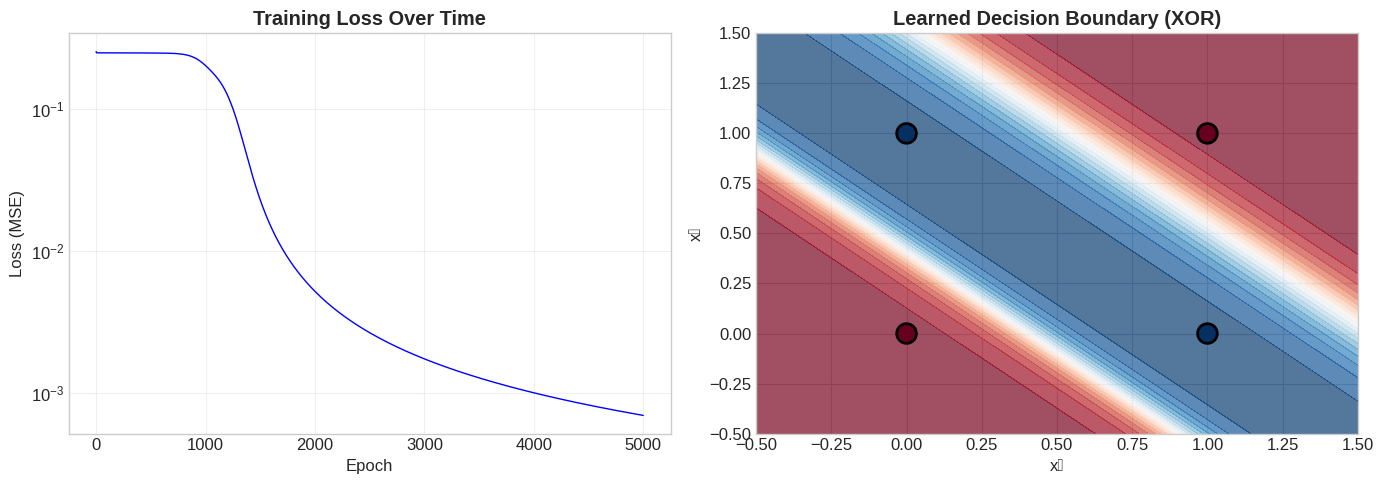

🎉 Success! The network learned XOR through backpropagation!
   Blue = 0, Red = 1. The curved boundary separates the XOR pattern.


In [13]:
import matplotlib.pyplot as plt

# Visualize training
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(losses, 'b-', linewidth=1)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training Loss Over Time', fontweight='bold')
axes[0].set_yscale('log')
axes[0].grid(True, alpha=0.3)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
Z = nn.forward(grid).reshape(xx.shape)

axes[1].contourf(xx, yy, Z, levels=20, cmap='RdBu', alpha=0.7)
axes[1].scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='RdBu', s=200, edgecolors='black', linewidth=2)
axes[1].set_xlabel('x₁')
axes[1].set_ylabel('x₂')
axes[1].set_title('Learned Decision Boundary (XOR)', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎉 Success! The network learned XOR through backpropagation!")
print("   Blue = 0, Red = 1. The curved boundary separates the XOR pattern.")

## 🎓 Summary: Calculus for Deep Learning

Congratulations! You've learned the calculus that powers deep learning!

### The Complete Training Loop

```python
for epoch in range(num_epochs):
    # 1. Forward pass: compute predictions
    predictions = model.forward(inputs)
    
    # 2. Compute loss: how wrong are we?
    loss = loss_function(predictions, targets)
    
    # 3. Backward pass: compute gradients using CHAIN RULE
    gradients = model.backward(loss)  # This is CALCULUS!
    
    # 4. Update weights: gradient descent
    weights = weights - learning_rate * gradients
```

### Key Concepts

| Concept | What It Does | Deep Learning Use |
|---------|-------------|-------------------|
| **Derivative** | Rate of change | Sensitivity of output to input |
| **Chain Rule** | Compose derivatives | Backpropagation through layers |
| **Gradient** | Vector of partials | Direction of steepest ascent |
| **Gradient Descent** | Follow negative gradient | Minimize loss function |
| **Backpropagation** | Efficient chain rule | Compute all gradients at once |

### The Core Equations

1. **Forward pass**: `z = Wx + b`, `a = activation(z)`
2. **Loss**: `L = loss_fn(prediction, target)`
3. **Backward pass**: `∂L/∂W = ∂L/∂a · ∂a/∂z · ∂z/∂W`
4. **Update**: `W = W - η · ∂L/∂W`

---
*Created with ❤️ for Introduction to Deep Neural Networks*

---

✅ **Section 5 Complete!** You now understand:
- How backpropagation uses the chain rule
- Forward pass saves values, backward pass computes gradients
- How a complete neural network learns

Now let's summarize everything!

---